In [13]:
import sys
import pandas as pd
import pickle
import joblib

# Step 1: Simulate the old pandas.indexes module (for backward compatibility)
import pandas.core.indexes
sys.modules['pandas.indexes'] = pd.core.indexes

# Step 2: Use encoding='latin1' to decode the old pickle file
file_path = r'C:\Users\songy\OneDrive\Desktop\archive\LSWMD.pki'

with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

print(" Successfully loaded the legacy pickle file!")
print("Data type:", type(data))

# Step 3: Save in a modern format (joblib or parquet is recommended)
modern_path = r'C:\Users\songy\OneDrive\Desktop\archive\LSWMD_modern.pkl'
joblib.dump(data, modern_path)

print(f" Conversion completed! Modern format file saved to:\n{modern_path}")


 已成功读取旧版 pickle 文件！
数据类型： <class 'pandas.core.frame.DataFrame'>
 转存完成！现代格式文件已保存到：
C:\Users\songy\OneDrive\Desktop\archive\LSWMD_modern.pkl


In [14]:
# Just a quick peek at the data!
data.shape


(811457, 6)

In [3]:
data.head()


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [4]:
data.columns


Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')

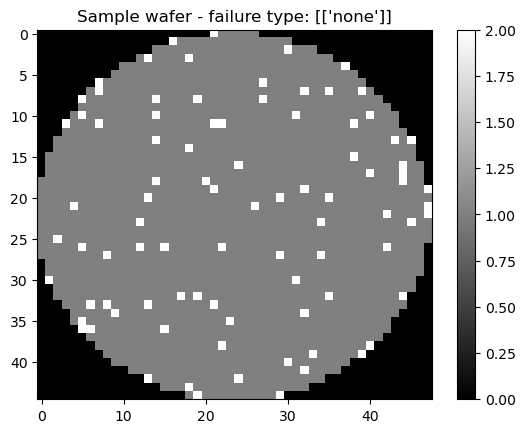

In [5]:
import matplotlib.pyplot as plt
import numpy as np


sample = data.iloc[0]  # randomly pick
wafer_map = np.array(sample['waferMap'])

plt.imshow(wafer_map, cmap='gray')
plt.title(f"Sample wafer - failure type: {sample['failureType']}")
plt.colorbar()
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Basic information
print("📌 Total number of samples:", len(data))
print("📌 Data columns:", data.columns.tolist())

# Convert failureType / trianTestLabel to strings for flattening
data['failureType_str'] = data['failureType'].astype(str)
data['trianTestLabel_str'] = data['trianTestLabel'].astype(str)

# Remove brackets and quotes, then extract the first element
data['failureType_flat'] = (
    data['failureType_str']
    .str.replace(r"[\[\]']", "", regex=True)  # remove [[ ]]
    .str.split()                             # split by space
    .str[0]                                  # take the first word (e.g., none, Center)
)

data['trianTestLabel_flat'] = (
    data['trianTestLabel_str']
    .str.replace(r"[\[\]']", "", regex=True)
    .str.split()
    .str[0]
)

# Defect type distribution
print("\n Defect type distribution (Top 10):")
print(data['failureType_flat'].value_counts().head(10))

# Train/Test label distribution
print("\n Train/Test sample distribution:")
print(data['trianTestLabel_flat'].value_counts())


📌 数据总量： 811457
📌 数据列： ['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel', 'failureType']

📊 缺陷类型分布（Top 10）：
failureType_flat
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

📊 训练/测试样本分布：
trianTestLabel_flat
Test        118595
Training     54355
Name: count, dtype: int64


In [7]:
# 提取每个 wafer map 的形状
shapes = data['waferMap'].apply(lambda x: np.array(x).shape)

# 统计各类 shape 的出现频率
shape_counts = shapes.value_counts()

print(" waferMap 尺寸分布（Top 10）：")
print(shape_counts.head(10))


📏 waferMap 尺寸分布（Top 10）：
waferMap
(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
(33, 33)     23886
(33, 29)     20276
(39, 37)     15327
(52, 59)     14812
(31, 31)     14569
Name: count, dtype: int64


In [8]:
# Extract the shape of each wafer map
shapes = data['waferMap'].apply(lambda x: np.array(x).shape)

# Count the frequency of different shapes
shape_counts = shapes.value_counts()

print(" waferMap shape distribution (Top 10):")
print(shape_counts.head(10))


⚠ 空 waferMap 数量: 0
⚠ NaN waferMap 数量: 0
⚠ 奇怪 shape 数量: 0


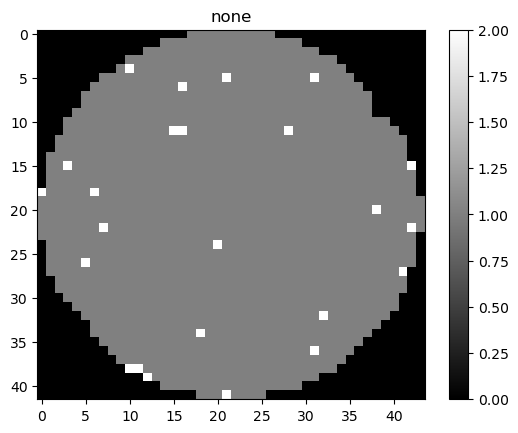

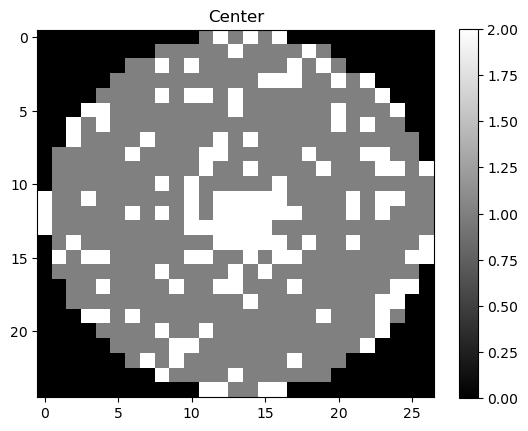

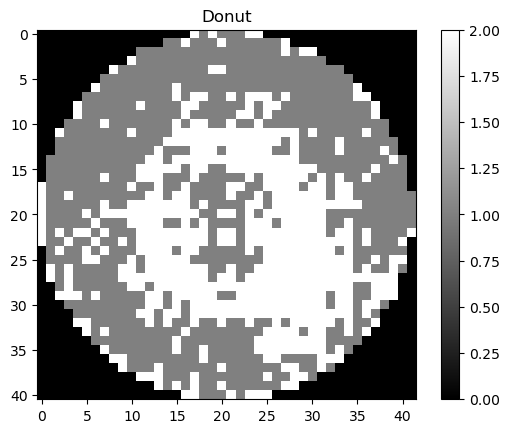

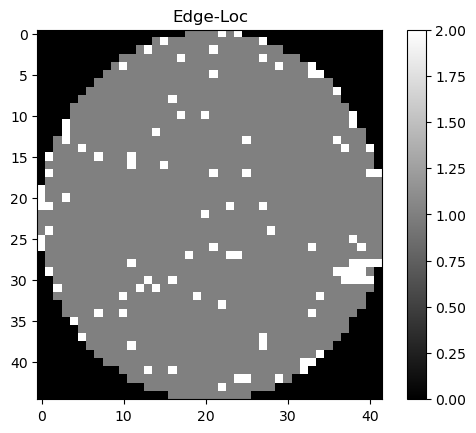

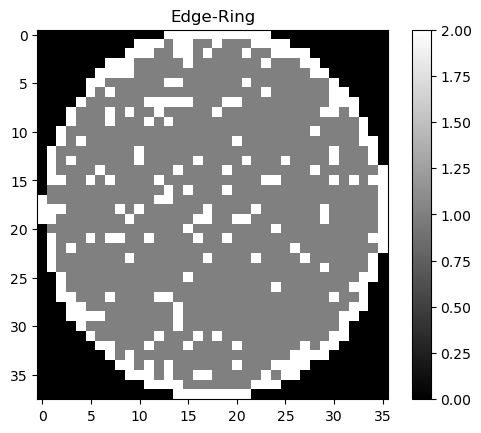

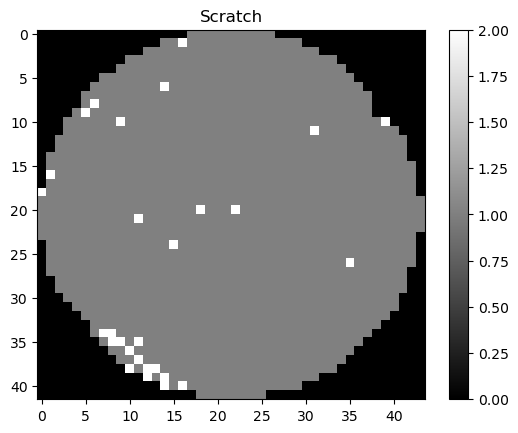

In [9]:
import matplotlib.pyplot as plt
import random

def plot_random_wafer(df, defect_type):
    subset = df[df['failureType_flat'] == defect_type]
    if len(subset) == 0:
        print(f"No samples of type {defect_type}")
        return
    sample = subset.sample(1).iloc[0]
    wafer = np.array(sample['waferMap'])
    plt.imshow(wafer, cmap='gray')
    plt.title(f"{defect_type}")
    plt.colorbar()
    plt.show()

for defect in ['none', 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Scratch']:
    plot_random_wafer(data, defect)


In [10]:
label_counts = data['failureType_flat'].value_counts()
print(label_counts.describe())
print("\n（<100） ：")
print(label_counts[label_counts < 100])


count         9.000000
mean      19216.666667
std       48175.274906
min         149.000000
25%         866.000000
50%        3593.000000
75%        5189.000000
max      147431.000000
Name: count, dtype: float64

类别太少（<100） 的标签：
Series([], Name: count, dtype: int64)


In [12]:
# Full version: WM-811K dataset 60/20/20 split (including unsupervised version)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Keep only waferMap and label columns
df = data[['waferMap', 'failureType_flat']].copy()

# Drop NaN values from the label column
df_clean = df.dropna(subset=['failureType_flat']).reset_index(drop=True)
print(f" Total number of samples after cleaning: {len(df_clean)}")

# Step 1: Train (60%) vs Temp (40%)
train_df, temp_df = train_test_split(
    df_clean,
    test_size=0.4,
    random_state=42,
    stratify=df_clean['failureType_flat']   # keep class distribution consistent
)

# Step 2: Temp → Validation (20%) vs Test (20%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['failureType_flat']
)

print(" Split results (supervised version):")
print(f"Train set: {len(train_df)}")
print(f"Validation set: {len(val_df)}")
print(f"Test set: {len(test_df)}")

# Optional: Check class distribution consistency
print("\nTrain set class distribution (Top 5):")
print(train_df['failureType_flat'].value_counts(normalize=True).head())
print("\nValidation set class distribution (Top 5):")
print(val_df['failureType_flat'].value_counts(normalize=True).head())
print("\nTest set class distribution (Top 5):")
print(test_df['failureType_flat'].value_counts(normalize=True).head())

# Unsupervised learning version (train set contains only 'none' samples)
train_unsup_df = train_df[train_df['failureType_flat'] == 'none'].reset_index(drop=True)
val_unsup_df   = val_df.reset_index(drop=True)   # validation set contains all classes
test_unsup_df  = test_df.reset_index(drop=True)  # test set contains all classes

print("\n Split results (unsupervised version):")
print(f"Train (none only): {len(train_unsup_df)}")
print(f"Validation (all): {len(val_unsup_df)}")
print(f"Test (all): {len(test_unsup_df)}")

# Optional: Save to files for later use
train_unsup_df.to_pickle("train_unsupervised.pkl")
val_unsup_df.to_pickle("val_unsupervised.pkl")
test_unsup_df.to_pickle("test_unsupervised.pkl")

print("\n Saved train/val/test datasets (unsupervised version)")


✅ 清洗后数据总量：172950
📊 划分结果（监督通用版）：
Train 集：103770
Val 集：34590
Test 集：34590

训练集类别分布（Top 5）：
failureType_flat
none         0.852453
Edge-Ring    0.055970
Edge-Loc     0.029999
Center       0.024824
Loc          0.020777
Name: proportion, dtype: float64

验证集类别分布（Top 5）：
failureType_flat
none         0.852443
Edge-Ring    0.055970
Edge-Loc     0.030009
Center       0.024834
Loc          0.020757
Name: proportion, dtype: float64

测试集类别分布（Top 5）：
failureType_flat
none         0.852443
Edge-Ring    0.055970
Edge-Loc     0.030009
Center       0.024834
Loc          0.020786
Name: proportion, dtype: float64

📊 无监督版本划分结果：
Train (none only)：88459
Val (all)：34590
Test (all)：34590

💾 已保存 train/val/test 数据集（无监督版本）
